# A. Programming

## Titanic survival prediction

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_path = 'titanic/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path,
                 delimiter=',',
                 index_col='PassengerId')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [129]:
dataset_arr = df.values
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [130]:
X, y

(array([[ 3.    ,  0.    , 22.    , ...,  7.25  ,  0.    ,  0.    ],
        [ 1.    ,  1.    , 38.    , ..., 71.2833,  1.    ,  1.    ],
        [ 3.    ,  1.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
        ...,
        [ 3.    ,  1.    , 28.    , ..., 23.45  ,  0.    ,  2.    ],
        [ 1.    ,  0.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
        [ 3.    ,  0.    , 32.    , ...,  7.75  ,  2.    ,  0.    ]]),
 array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0.,

In [131]:
X_b = np.hstack((np.ones(shape= (len(X) , 1)), X))
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [132]:
val_size = 0.2
test_size = 0.125
random_state = 1
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split (
    X_b , y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split (
    X_train , y_train,
    test_size = test_size ,
    random_state = random_state ,
    shuffle = is_shuffle
)

In [133]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])
print(X_train.shape)
print(y_train.shape)

(623, 9)
(623,)


In [135]:
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

def predict (X, theta ):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss (y_hat , y):
    # output shape is a single number
    y_hat = np.clip(y_hat , 1e-7 , 1 - 1e-7)
    loss = - (np.dot(y.T, np.log(y_hat)) +
             np.dot((1 - y).T, np.log(1 - y_hat))) / len(y)    
    return loss

def compute_gradient (X, y, y_hat):
    # output shape is (X.shape[1],)
    return np.dot(X.T, y_hat - y) / len(y)

def update_theta (theta , gradient , lr) :
    # output shape is (X.shape[1],)
    return theta - lr * gradient

def compute_accuracy (X, y, theta ):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [136]:
lr = 0.01
epochs = 100
batch_size = 8
np.random.seed(random_state)
theta = np.random.uniform(
    size = X_train.shape[1]
)

In [137]:
# epoch accuracy and loss lists 
train_accs = []
train_losses = []
val_accs = []
val_losses = []
for epoch in range ( epochs ) :
    # accuracy and loss lists for each batch in an epoch
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range (0 , X_train.shape[0], batch_size) :
        # 2d array shape
        X_i = X_train[i:i+ batch_size]
        # 1d array shape
        y_i = y_train[i:i+ batch_size]

        # 1d array shape
        y_hat = predict(X_i, theta)

        # return a number
        train_loss = compute_loss(y_hat, y_i)

        # return (X.shape[1],)
        gradient = compute_gradient(X_i , y_i, y_hat)

        # return (X.shape[1],)
        theta = update_theta(theta, gradient, lr)

        # compute losses and accs
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    # After training all batches in an epoch
    mean_train_batch_loss = sum ( train_batch_losses ) / len (  train_batch_losses )
    mean_val_batch_loss = sum ( val_batch_losses ) / len ( val_batch_losses )
    mean_train_batch_acc = sum ( train_batch_accs ) / len ( train_batch_accs )
    mean_val_batch_acc = sum ( val_batch_accs ) / len ( val_batch_accs )

    train_losses . append ( mean_train_batch_loss )
    val_losses . append ( mean_val_batch_loss )
    train_accs . append ( mean_train_batch_acc )
    val_accs . append ( mean_val_batch_acc )

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : {mean_train_batch_loss :.3f}\tValidation loss : {mean_val_batch_loss :.3f}')


EPOCH 1:	Training loss : 0.781	Validation loss : 0.800

EPOCH 2:	Training loss : 0.679	Validation loss : 0.705

EPOCH 3:	Training loss : 0.614	Validation loss : 0.644

EPOCH 4:	Training loss : 0.570	Validation loss : 0.603

EPOCH 5:	Training loss : 0.540	Validation loss : 0.576

EPOCH 6:	Training loss : 0.519	Validation loss : 0.556

EPOCH 7:	Training loss : 0.503	Validation loss : 0.542

EPOCH 8:	Training loss : 0.490	Validation loss : 0.531

EPOCH 9:	Training loss : 0.481	Validation loss : 0.523

EPOCH 10:	Training loss : 0.473	Validation loss : 0.517

EPOCH 11:	Training loss : 0.467	Validation loss : 0.512

EPOCH 12:	Training loss : 0.462	Validation loss : 0.508

EPOCH 13:	Training loss : 0.458	Validation loss : 0.505

EPOCH 14:	Training loss : 0.454	Validation loss : 0.502

EPOCH 15:	Training loss : 0.451	Validation loss : 0.500

EPOCH 16:	Training loss : 0.448	Validation loss : 0.498

EPOCH 17:	Training loss : 0.446	Validation loss : 0.496

EPOCH 18:	Training loss : 0.444	Validat

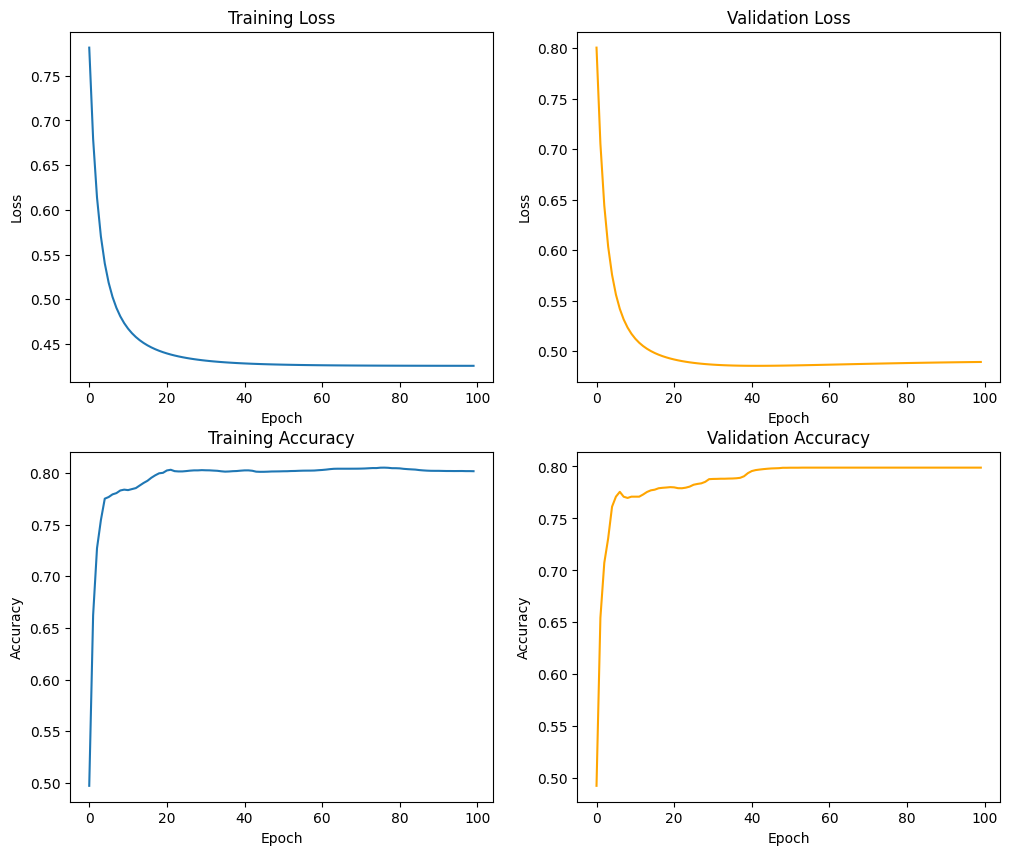

In [138]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot ( train_losses )
ax [0 , 0]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 0]. set_title ('Training Loss')

ax [0 , 1]. plot ( val_losses ,'orange')
ax [0 , 1]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 1]. set_title ('Validation Loss')

ax [1 , 0]. plot ( train_accs )
ax [1 , 0]. set ( xlabel ='Epoch' , ylabel ='Accuracy')
ax [1 , 0]. set_title ('Training Accuracy')

ax [1 , 1]. plot ( val_accs , 'orange' )
ax [1 , 1]. set ( xlabel ='Epoch' , ylabel ='Accuracy')
ax [1 , 1]. set_title ('Validation Accuracy')

plt.show()

In [139]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy (X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.7988826815642458
Accuracy : 0.7415730337078652


# Twitter Sentiment Analysis

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [161]:
dataset_path = 'twitter_sentiment/sentiment_analysis.csv'
df = pd.read_csv(dataset_path,
                 delimiter=',',
                 index_col='id')
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


In [162]:
def text_normalize ( text ) :
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text )
    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text )
    # Hashtags removal
    text = re.sub(r'#', '', text )

    # Punctuation removal
    text = re.sub (r'[^\w\s]', '', text )

    # Tokenization
    tokenizer = TweetTokenizer (
        preserve_case =False ,
        strip_handles =True ,
        reduce_len = True
    )
    text_tokens = tokenizer . tokenize ( text )
    return text_tokens

In [163]:
# Create a dictionary to store frequencies of each (token, label) pair
# Example: ('apple', 1) : 1, ('hate', 0) : 12, ('love', 1) : 4
def get_freqs (df) :
    freqs = defaultdict ( lambda : 0)
    for idx , row in df. iterrows () :
        tweet = row ['tweet']
        label = row ['label']

        tokens = text_normalize ( tweet )
        for token in tokens :
            pair = (token , label )
            freqs [ pair ] += 1

    return freqs

In [164]:
# Count the total of positive and negative labels for each token in a tweet
# X = (intercept = 1, n_positives, n_negatives)
def get_feature (text , freqs ) :
    tokens = text_normalize ( text )
    X = np. zeros (3)
    X[0] = 1
    for token in tokens :
        X[1] += freqs [( token , 0) ]
        X[2] += freqs [( token , 1) ]

    return X

In [165]:
X = []
y = []
# build a dictionary of frequencies
freqs = get_freqs(df)
print(freqs)
# data conversion
for idx , row in df. iterrows () :
    tweet = row ['tweet']
    label = row ['label']
    X_i = get_feature (tweet , freqs )
    X. append (X_i)
    y. append ( label )

X = np. array (X)
y = np. array (y)

defaultdict(<function get_freqs.<locals>.<lambda> at 0x000002326F3EC4C0>, {('fingerprint', 0): 4, ('pregnancy', 0): 1, ('test', 0): 8, ('finally', 0): 168, ('a', 0): 727, ('transparant', 0): 1, ('silicon', 0): 1, ('case', 0): 228, ('thanks', 0): 94, ('to', 0): 876, ('my', 0): 1227, ('uncle', 0): 4, ('yay', 0): 63, ('sony', 0): 701, ('xperia', 0): 54, ('s', 0): 38, ('sonyexperias', 0): 1, ('we', 0): 159, ('love', 0): 385, ('this', 0): 456, ('would', 0): 95, ('you', 0): 557, ('go', 0): 67, ('talk', 0): 12, ('makememories', 0): 1, ('unplug', 0): 2, ('relax', 0): 31, ('iphone', 0): 2905, ('smartphone', 0): 61, ('wifi', 0): 36, ('connect', 0): 1, ('im', 0): 182, ('wired', 0): 4, ('i', 0): 1046, ('know', 0): 58, ('george', 0): 1, ('was', 0): 68, ('made', 0): 46, ('that', 0): 153, ('way', 0): 32, ('cute', 0): 261, ('daventry', 0): 1, ('home', 0): 116, ('what', 1): 72, ('amazing', 1): 7, ('service', 1): 25, ('apple', 1): 1258, ('wont', 1): 71, ('even', 1): 53, ('talk', 1): 3, ('to', 1): 990, (

In [166]:
X,y

(array([[1.000e+00, 1.300e+01, 2.000e+00],
        [1.000e+00, 4.183e+03, 2.788e+03],
        [1.000e+00, 4.768e+03, 1.425e+03],
        ...,
        [1.000e+00, 6.175e+03, 4.635e+03],
        [1.000e+00, 3.814e+03, 1.959e+03],
        [1.000e+00, 6.160e+03, 3.181e+03]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [167]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True
X_train , X_val , y_train , y_val = train_test_split (
    X, y,
    test_size = val_size ,
    random_state = random_state ,
    shuffle = is_shuffle
)

X_train , X_test , y_train , y_test = train_test_split (
    X_train , y_train ,
    test_size = test_size ,
    random_state = random_state ,
    shuffle = is_shuffle
)

In [168]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])

In [169]:
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

def predict (X, theta ):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss (y_hat , y):
    # output shape is a single number
    y_hat = np.clip(y_hat , 1e-7 , 1 - 1e-7)
    loss = - (np.dot(y.T, np.log(y_hat)) +
             np.dot((1 - y).T, np.log(1 - y_hat))) / len(y)    
    return loss

def compute_gradient (X, y, y_hat):
    # output shape is (X.shape[1],)
    return np.dot(X.T, y_hat - y) / len(y)

def update_theta (theta , gradient , lr) :
    # output shape is (X.shape[1],)
    return theta - lr * gradient

def compute_accuracy (X, y, theta ):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [170]:
lr = 0.01
epochs = 200
batch_size = 128
np. random . seed ( random_state )
theta = np. random . uniform (
    size = X_train . shape [1]
)

In [171]:
# epoch accuracy and loss lists 
train_accs = []
train_losses = []
val_accs = []
val_losses = []
for epoch in range ( epochs ) :
    # accuracy and loss lists for each batch in an epoch
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range (0 , X_train.shape[0], batch_size) :
        # 2d array shape
        X_i = X_train[i:i+ batch_size]
        # 1d array shape
        y_i = y_train[i:i+ batch_size]

        # 1d array shape
        y_hat = predict(X_i, theta)

        # return a number
        train_loss = compute_loss(y_hat, y_i)

        # return (X.shape[1],)
        gradient = compute_gradient(X_i , y_i, y_hat)

        # return (X.shape[1],)
        theta = update_theta(theta, gradient, lr)

        # compute losses and accs
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    # After training all batches in an epoch
    mean_train_batch_loss = sum ( train_batch_losses ) / len (  train_batch_losses )
    mean_val_batch_loss = sum ( val_batch_losses ) / len ( val_batch_losses )
    mean_train_batch_acc = sum ( train_batch_accs ) / len ( train_batch_accs )
    mean_val_batch_acc = sum ( val_batch_accs ) / len ( val_batch_accs )

    train_losses . append ( mean_train_batch_loss )
    val_losses . append ( mean_val_batch_loss )
    train_accs . append ( mean_train_batch_acc )
    val_accs . append ( mean_val_batch_acc )

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : {mean_train_batch_loss :.3f}\tValidation loss : {mean_val_batch_loss :.3f}')


EPOCH 1:	Training loss : 0.707	Validation loss : 0.704

EPOCH 2:	Training loss : 0.661	Validation loss : 0.659

EPOCH 3:	Training loss : 0.624	Validation loss : 0.622

EPOCH 4:	Training loss : 0.594	Validation loss : 0.591

EPOCH 5:	Training loss : 0.569	Validation loss : 0.566

EPOCH 6:	Training loss : 0.548	Validation loss : 0.546

EPOCH 7:	Training loss : 0.531	Validation loss : 0.528

EPOCH 8:	Training loss : 0.516	Validation loss : 0.514

EPOCH 9:	Training loss : 0.504	Validation loss : 0.502

EPOCH 10:	Training loss : 0.494	Validation loss : 0.491

EPOCH 11:	Training loss : 0.485	Validation loss : 0.483

EPOCH 12:	Training loss : 0.477	Validation loss : 0.475

EPOCH 13:	Training loss : 0.471	Validation loss : 0.468

EPOCH 14:	Training loss : 0.465	Validation loss : 0.463

EPOCH 15:	Training loss : 0.460	Validation loss : 0.457

EPOCH 16:	Training loss : 0.456	Validation loss : 0.453

EPOCH 17:	Training loss : 0.452	Validation loss : 0.449

EPOCH 18:	Training loss : 0.448	Validat

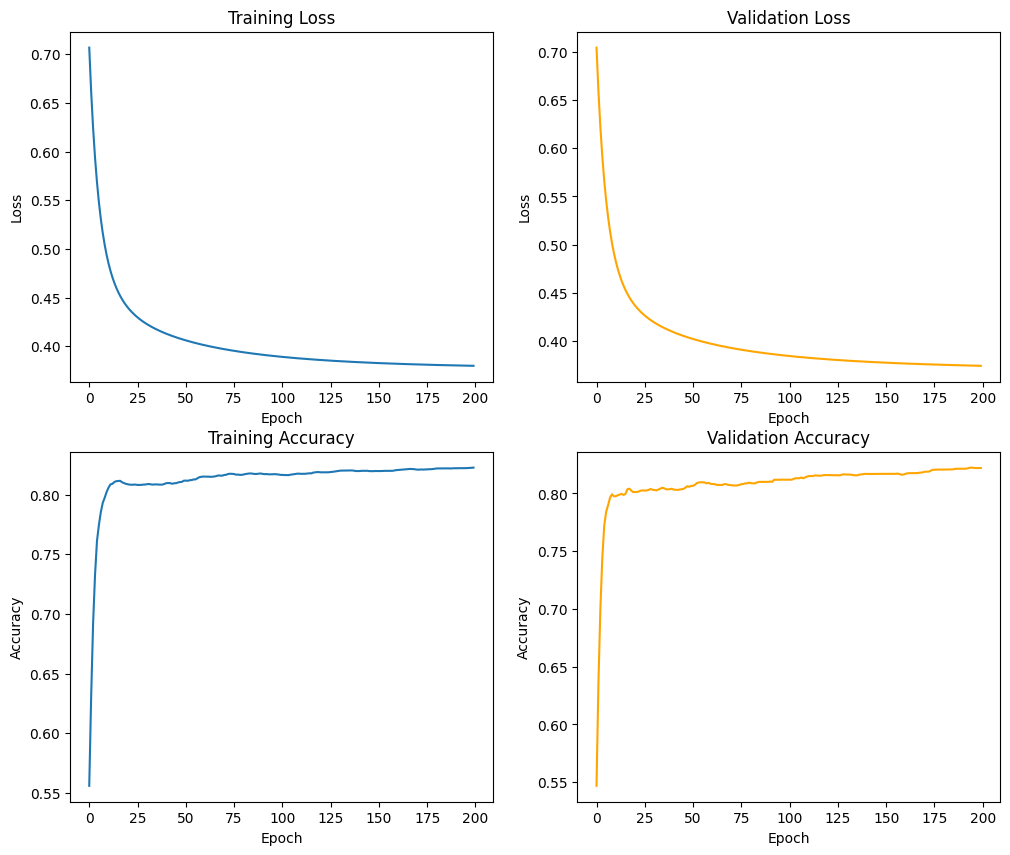

In [172]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot ( train_losses )
ax [0 , 0]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 0]. set_title ('Training Loss')

ax [0 , 1]. plot ( val_losses ,'orange')
ax [0 , 1]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 1]. set_title ('Validation Loss')

ax [1 , 0]. plot ( train_accs )
ax [1 , 0]. set ( xlabel ='Epoch' , ylabel ='Accuracy')
ax [1 , 0]. set_title ('Training Accuracy')

ax [1 , 1]. plot ( val_accs , 'orange' )
ax [1 , 1]. set ( xlabel ='Epoch' , ylabel ='Accuracy')
ax [1 , 1]. set_title ('Validation Accuracy')

plt.show()

In [174]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy (X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.821969696969697
Accuracy : 0.8434343434343434


# B. Multiple choices

In [ ]:
Q1 = "A"
Q2 = "B"
Q3 = "C"
Q4 = "C"
Q5 = "B"
Q6 = "B"
Q7 = "A"
Q8 = "B"
Q9 = "B"
Q10 = "A"
Q11 = "A"
Q12 = "A"
Q13 = "C"
def predict (X, theta ) :
    z = np.dot (X, theta )
    return 1 / (1 + np.exp ( -z) )

print('Q13 = ', predict(
    np.array([22.3, -1.5, 1.1, 1]),
    np.array([0.1, -0.15, 0.3, -0.2])))
Q14 = "A"
def compute_loss (y_hat , y) :
    y_hat = np. clip (y_hat , 1e-7 , 1-1e-7)
    return ( -y * np.log ( y_hat ) - (1 - y) *
             np. log (1 - y_hat ) ).mean()
print('Q14 = ', compute_loss(
    np.array([0.8, 0.75, 0.3, 0.95]),
    np.array([1,0,0,1])).round(3))

Q15 = "B"
Q16 = "C"
def compute_gradient (X, y_true , y_pred ) :
    gradient = np. dot (X.T, ( y_pred - y_true ) ) / y_true . size
    return gradient
print('Q16 = ', compute_gradient(
    np.array([[1, 2], [2, 1], [1, 1], [2, 2]]),
    np.array([0,1,0,1]), np.array([0.25, 0.75,0.4, 0.8])).round(3))

Q17 = "D"
def compute_accuracy (y_true , y_pred ) :
    y_pred_rounded = np. round ( y_pred )
    accuracy = np. mean ( y_true == y_pred_rounded )
    return accuracy

print('Q17 = ', compute_accuracy(
    np.array([1,0,1,1]), np.array([0.85, 0.35, 0.9, 0.75])))

Q18 = "A"
def compute_gradient (X, y_true , y_pred ) :
    gradient = np. dot (X.T, ( y_pred - y_true ) ) / y_true . size
    return gradient

print('Q18 = ', compute_gradient(
    np.array([[1, 3], [2, 1], [3, 2], [1, 2]]),
    np.array([1,0,1,1]), np.array([0.7, 0.4,0.6, 0.85])).round(3))

Q13 =  0.9298899437785819
Q14 =  0.504
Q16 =  [-0.062  0.063]
Q17 =  1.0
Q18 =  [-0.213 -0.4  ]
